# Heart Failure Prediction Project  
## Module 06 and 07

Dataset: **Heart Failure Prediction** from Kaggle (`heart.csv`)

Link: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download

In this notebook we will go step by step through:

### Module 06: Exploratory Data Analysis (EDA)
- Understanding data distributions, correlations, and patterns  
- Visualizing data with histograms, scatter plots, heatmaps, and pairplots  
- Identifying data imbalance and relationships between variables  
- EDA best practices before model building  

### Module 07: Data Preprocessing and Feature Engineering
- Handling missing values, encoding categorical data, and normalization or scaling  
- Outlier detection and handling  
- Feature transformation such as polynomial features and binning  
- Feature construction and domain driven feature creation  

> Insight: Think of EDA as having a conversation with your dataset. Preprocessing and feature engineering come after that conversation, when you decide what to fix, what to highlight, and what to ignore.

## 1. Setup and Data Loading

In this section we will:

1. Import basic libraries  
2. Upload and load the `heart.csv` file  
3. Take a first quick look at the data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme(font_scale=1.1)


df=pd.read_csv("heart.csv")
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


**Attribute Information:**

* Age: age of the patient [years]

* Sex: sex of the patient [M: Male, F: Female]

* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

* RestingBP: resting blood pressure [mm Hg]

* Cholesterol: serum cholesterol [mm/dl]

* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

* Oldpeak: oldpeak = ST [Numeric value measured in depression]

* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

* HeartDisease: output class [1: heart disease, 0: Normal]

In [2]:
# basic info 
print("Shape: ",df.shape)

Shape:  (918, 12)


In [5]:
print("Info")
df.info()

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
# Quick descriptive statistics for numeric columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


> Insight: At this point you should know basic things like how many rows and columns you have, what each column type is, and whether there are any suspicious values such as negative ages or impossible measurements.

## 2. Define Target and Feature Types

We will explicitly define which columns are numeric and which are categorical. This helps keep the rest of the notebook clean and less error prone.

In [11]:
target_column="HeartDisease"

numeric_cols=["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]

categorical_cols=["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]

print("This is target Column: ",target_column)
print("This is numerical Columns: ",numeric_cols)
print("This is categorical Columns: ",categorical_cols)

This is target Column:  HeartDisease
This is numerical Columns:  ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
This is categorical Columns:  ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


> Insight: Explicitly listing numeric and categorical features makes your work reproducible. It also forces you to think about each column and its meaning, which is a key habit in serious ML projects.

# Module 06: Exploratory Data Analysis (EDA)

## 3. Missing Values and Basic Quality Checks

In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [14]:
#look at some basic values range

df[numeric_cols].agg(["min","max","mean","median"]).T

,min,max,mean,median
Age,28.0,77.0,53.510893,54.0
RestingBP,0.0,200.0,132.396514,130.0
Cholesterol,0.0,603.0,198.799564,223.0
FastingBS,0.0,1.0,0.233115,0.0
MaxHR,60.0,202.0,136.809368,138.0
Oldpeak,-2.6,6.2,0.887364,0.6


In [16]:
# catogorical columns check

for c in categorical_cols:
    print(c,":",df[c].unique())

Sex : ['M' 'F']
ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
RestingECG : ['Normal' 'ST' 'LVH']
ExerciseAngina : ['N' 'Y']
ST_Slope : ['Up' 'Flat' 'Down']


> Insight: Even if the dataset description claims there are no missing values, always verify. Real world data often breaks promises.

> Insight: Look for impossible or suspicious ranges such as zero cholesterol or resting blood pressure that is extremely low or high. These may be data entry issues or special codes that you need to treat carefully.

## 4. Understanding Distributions with Histograms and Boxplots

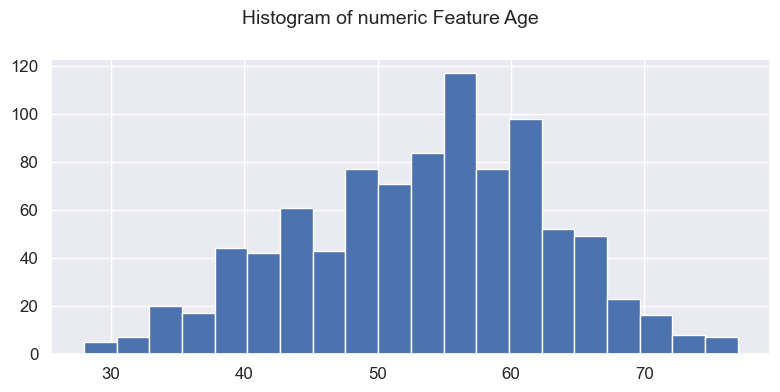

In [19]:
# Histograms for numeric features
df["Age"].hist(bins=20,figsize=(8,4))
plt.suptitle("Histogram of numeric Feature Age",fontsize=14)
plt.tight_layout()
plt.show()

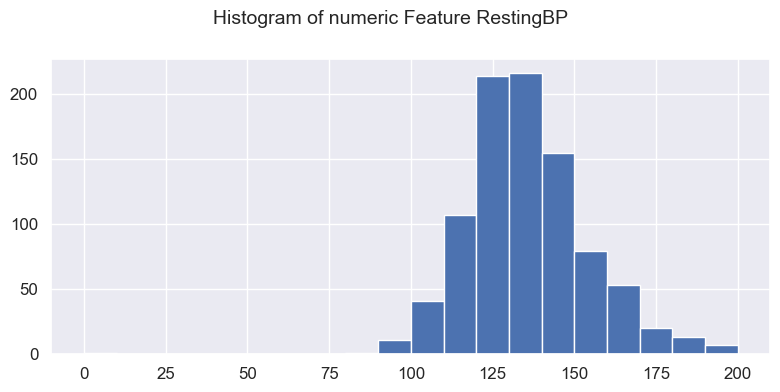

In [21]:
# Histograms for numeric features
df["RestingBP"].hist(bins=20,figsize=(8,4))
plt.suptitle("Histogram of numeric Feature RestingBP",fontsize=14)
plt.tight_layout()
plt.show()

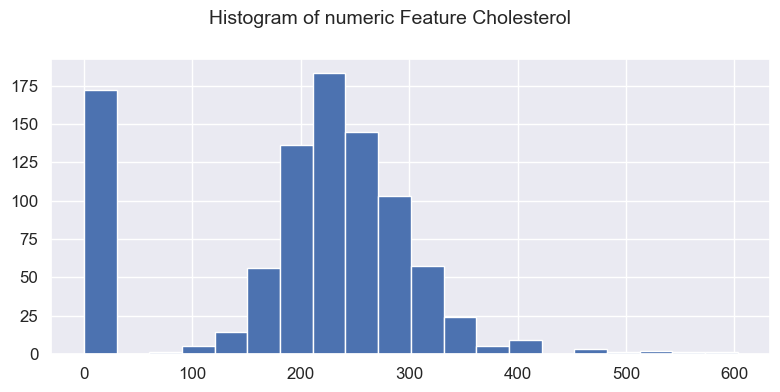

In [22]:
# Histograms for numeric features
df["Cholesterol"].hist(bins=20,figsize=(8,4))
plt.suptitle("Histogram of numeric Feature Cholesterol",fontsize=14)
plt.tight_layout()
plt.show()

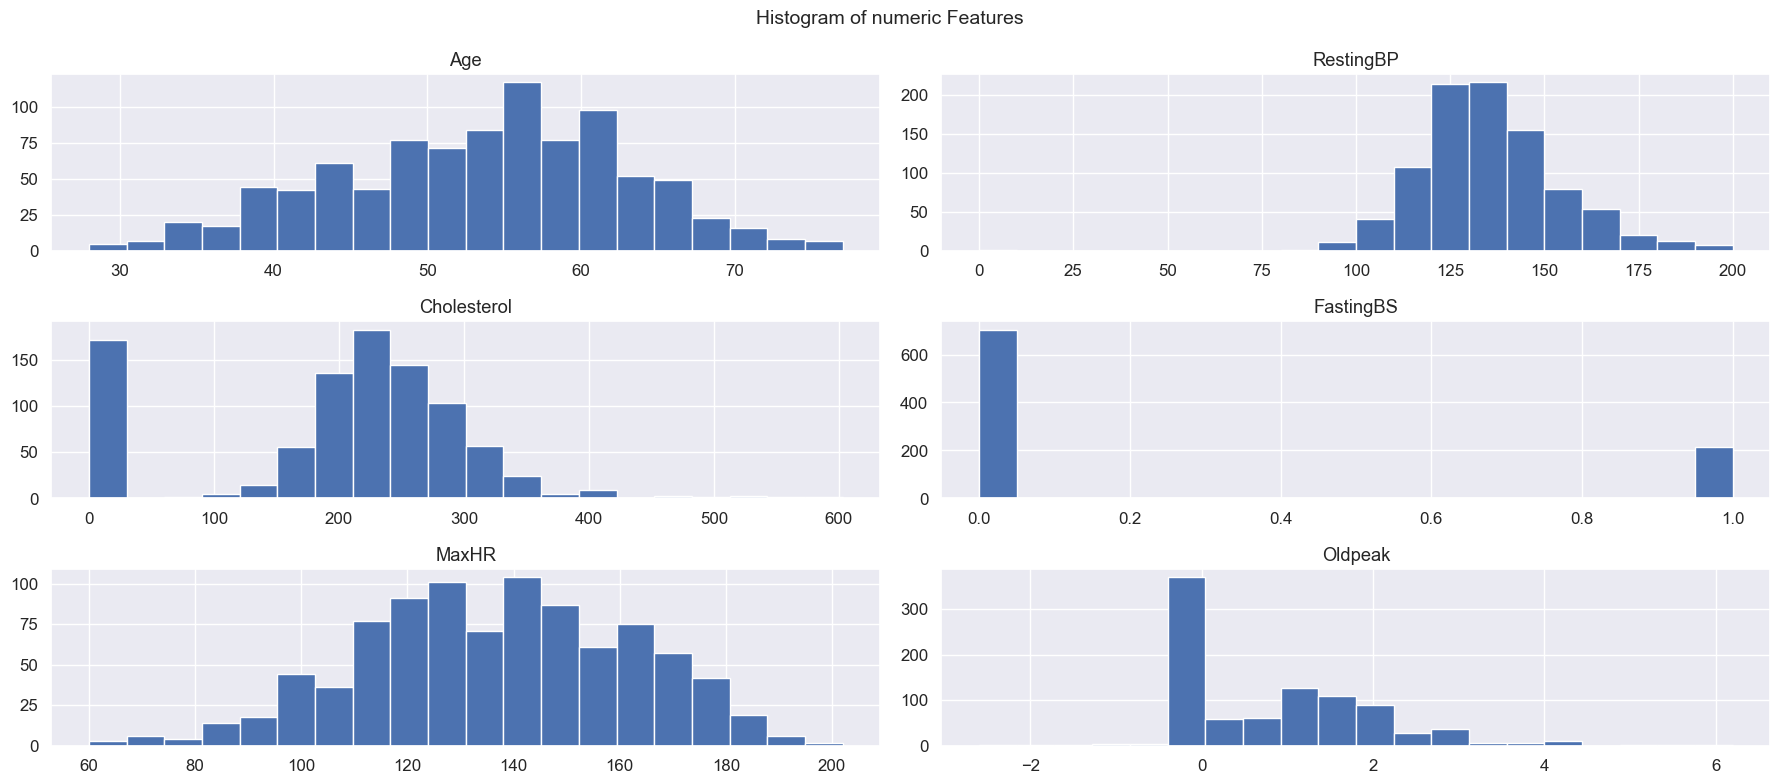

In [23]:
# Histograms for numeric features
df[numeric_cols].hist(bins=20,figsize=(18,8))
plt.suptitle("Histogram of numeric Features",fontsize=14)
plt.tight_layout()
plt.show()

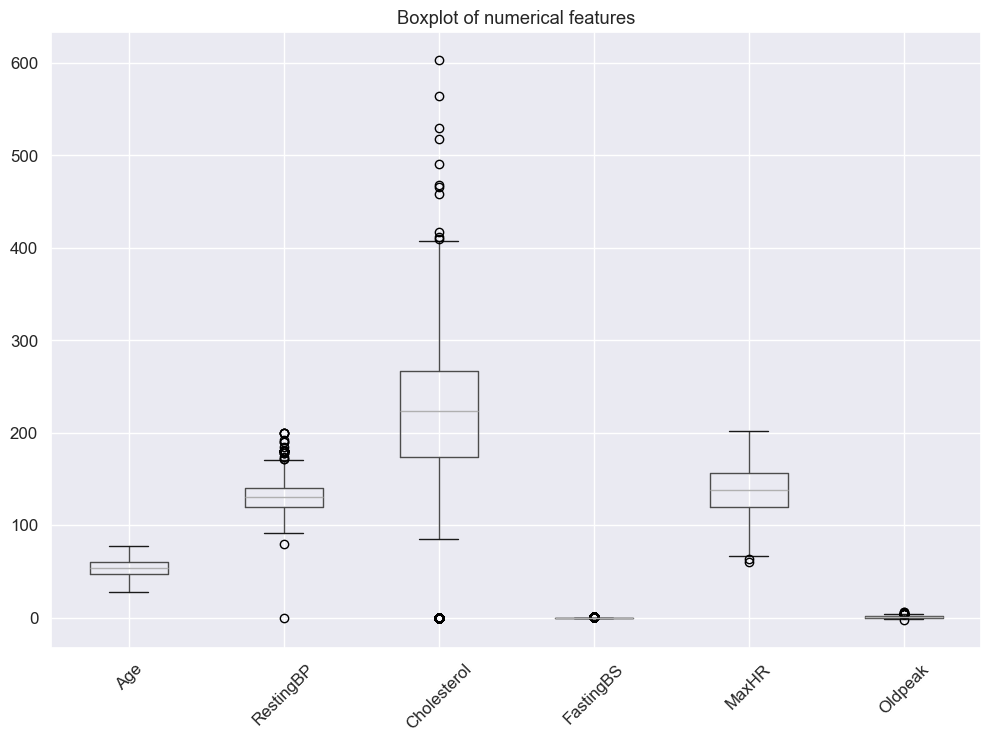

In [24]:
# boxplots to get a sense of spread and possible outliers
plt.figure(figsize=(12,8))
df[numeric_cols].boxplot()
plt.title("Boxplot of numerical features")
plt.xticks(rotation=45)
plt.show()

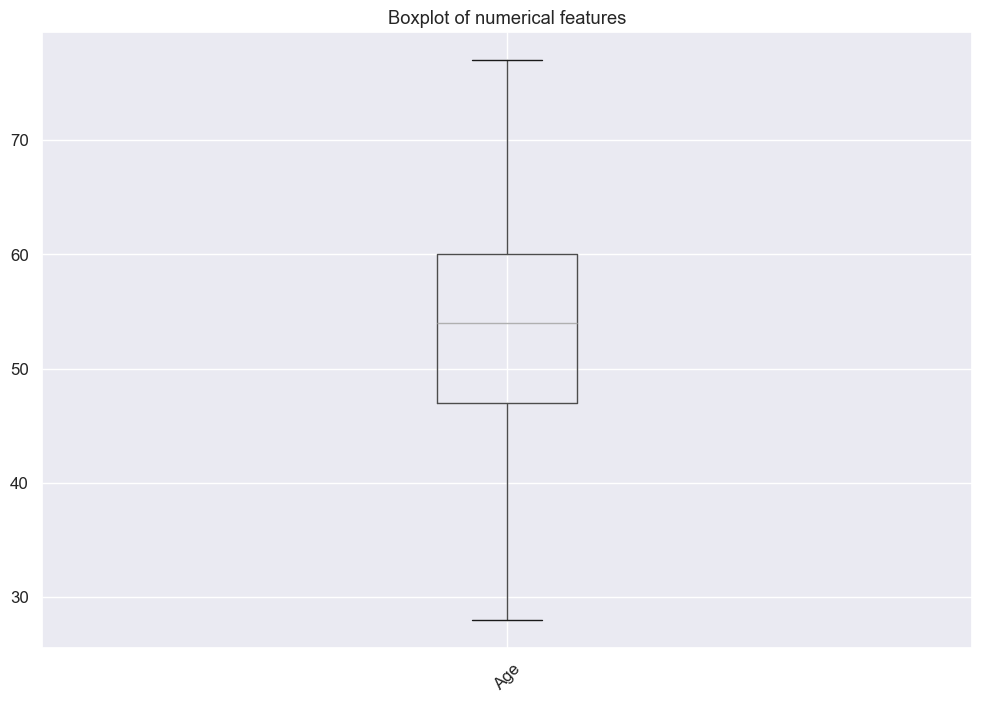

In [25]:
# boxplots to get a sense of spread and possible outliers
plt.figure(figsize=(12,8))
df.boxplot(column=numeric_cols[0])
plt.title("Boxplot of numerical features")
plt.xticks(rotation=45)
plt.show()

> Insight: Histograms tell you the shape of distributions. Boxplots give a quick view of spread and potential outliers. Before you do any scaling or transformation, you should already have a mental picture of how these variables behave.

## 5. Target Distribution and Class Imbalance

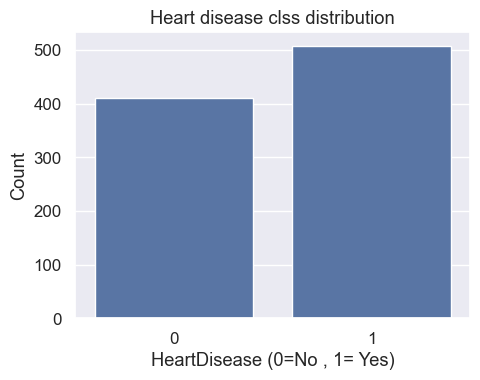

In [26]:
plt.figure(figsize=(5,4))
sns.countplot(x=df[target_column])
plt.title("Heart disease clss distribution")
plt.xlabel("HeartDisease (0=No , 1= Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [27]:
df[target_column].value_counts(normalize=True)

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

> Insight: If one class dominates heavily, you may need resampling strategies or class weighted models later. Even if the imbalance is moderate, it is critical to be aware of it before you start modeling.

## 6. Categorical Feature Exploration

> Insight: For categorical variables, check if some categories have very few samples. Rare categories can be merged, encoded carefully, or sometimes dropped if they add noise instead of signal.

## 7. Relationships Between Features and Target

We will first visualize numeric features against the target and then look at correlations.

> Insight: Large differences in distributions between target classes often signal strong predictive potential. If the distributions are almost identical, that feature may be less useful on its own.

### 7.1 Pairplot for a Subset of Features

> Insight: Pairplots are expensive but powerful for small to medium sized datasets. Use them on a subset of features that you suspect are important, not on every column.

### 7.2 Correlation Matrix and Heatmap

> Insight: High absolute correlation with the target is interesting, but do not ignore low correlation features. Some of them can become powerful in combination with others. Also watch for high correlation between predictors, which may indicate redundancy.

### 7.3 Categorical Features vs Target

> Insight: Crosstabs normalized by row are very helpful. They show how the risk of heart disease changes across categories such as chest pain type or ST slope. This is more informative than just raw counts.

## 8. EDA Best Practices Before Model Building

Some practical guidelines:

- Read the dataset description and understand dataset context where possible  
- Verify data types and ranges, do not trust them blindly  
- Check missing values and consider if they are random or systematic  
- Study distributions, not just summary statistics  
- Look at target distribution and potential class imbalance  
- Explore feature target relationships through plots and simple statistics  
- Take notes about:
  - Features that look noisy or suspicious  
  - Features that seem strongly related to the target  
  - Possible transformations such as log, binning, or scaling  
  - Any domain inspired features you might create later  

> Insight: Good EDA is like building a mental simulation of how your data behaves. Once that simulation is clear, the choices in preprocessing and modeling feel much less random.

# Module 07: Data Preprocessing and Feature Engineering

We now use the insights from EDA to clean and transform the data in a systematic way so that it is ready for model training.

## 9. Handling Missing Values

In [ ]:
#Handling Missing Values

> Insight: Always keep a clean copy of your processed data, for example `df_clean`, instead of overwriting the original `df`. This protects you from messy debugging later.

## 10. Encoding Categorical Variables

In [ ]:
#Encoding Categorical Variables

In [ ]:
# Get feature names after one hot encoding

> Insight: One hot encoding expands categorical variables into multiple binary columns. This can increase dimensionality, but it lets models treat categories in a clean numeric form without assuming any artificial order.

## 11. Normalization and Scaling

In [ ]:
#Normalization and Scaling

In [ ]:
# Visual comparison for one feature

> Insight: Scaling does not change the shape of the distribution, only the scale. StandardScaler centers and scales by standard deviation, useful for models that assume roughly standard normal inputs. MinMaxScaler squeezes values into a fixed range such as zero to one, which is useful for distance based models and some neural networks.

## 12. Outlier Detection and Handling

In [ ]:
#Outlier Detection and Handling

In [ ]:
# Capping outliers

> Insight: Outlier handling is a judgment call that depends on domain knowledge. In medical data, very high cholesterol might be real and clinically important. Capping should be used carefully, not blindly.

## 13. Feature Transformation: Polynomial Features and Binning

In [ ]:
#Feature Transformation: Polynomial Features and Binning

> Insight: Polynomial features let linear models capture simple nonlinear relationships. Too many polynomial terms can increase overfitting, so this is usually applied to a small set of carefully chosen features.

In [ ]:
# Binning Age into three groups

In [ ]:
#Visualization after Binning

> Insight: Binning turns a numeric feature into an ordered categorical one. This can make models more robust when exact numerical differences are less important than category boundaries.

## 14. Domain Driven Feature Construction

In [ ]:
# Heart rate reserve: predicted max minus observed max

# Blood pressure risk flag

# Cholesterol risk flag

# ST depression positive flag

In [ ]:
# Correlation of new numeric features with target

> Insight: Domain driven features are where human understanding beats automated feature generation. Even simple rules such as blood pressure thresholds or heart rate reserve can add clinically meaningful signal to the model.

## 15. Putting It All Together in a Preprocessing Pipeline

In [ ]:
#Putting It All Together in a Preprocessing Pipeline


# Combine all features that will be used by the preprocessor


> Insight: ColumnTransformer plus Pipeline gives you a single reusable object that knows exactly how to clean, transform, and encode your data. This same object can be used for training, cross validation, and test evaluation without leaking information from test to train.

## 16. Quick Sanity Check with a Simple Model

This is not a full modeling module, but we can quickly train a logistic regression model to verify that our preprocessing pipeline and features behave sensibly.

In [ ]:
#Quick Sanity Check with a Simple Model

> Final Insight: EDA tells you what is going on, preprocessing and feature engineering turn that understanding into a consistent data pipeline, and only then does modeling make sense. Skipping any of these steps usually shows up later as poor accuracy, unstable results, or models that fail silently in production.